In [74]:
import re

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

## Loading Dataset

In [75]:
data = pd.read_csv("empathy_data.csv", encoding = 'utf-8')

data = data.dropna()

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26408 entries, 0 to 26408
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26408 non-null  int64 
 1   emotion     26408 non-null  object
 2   response    26408 non-null  object
 3   context     26408 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [77]:
data.head(10)

,Unnamed: 0,emotion,response,context
0,0,sentimental,"was this a friend you were in love with , or j...",i remember going to see the fireworks with my ...
1,1,sentimental,where has she gone ?,i remember going to see the fireworks with my ...
2,2,afraid,oh ya ? i do not really see how,it feels like hitting to blank wall when i see...
3,3,afraid,i do actually hit blank walls a lot of times b...,it feels like hitting to blank wall when i see...
4,4,proud,doing good.. how about you,hi how are you doing today
5,5,faithful,"and thats something you should never do , good...",i have never cheated on my wife .
6,6,terrified,do not be nervous . just be prepared .,"job interviews always make me sweat bullets , ..."
7,7,joyful,sounds great ! so what is your major ?,"hi , this year , i was the first over 300 stud..."
8,8,angry,i am sorry to hear that . did it happen out of...,i lost my job last year and got really angry .
9,9,sad,"wow , that must be terrible , i can not imagin...","during christmas a few years ago , i did not g..."


In [78]:
pd.unique(data['emotion'])

array(['sentimental', 'afraid', 'proud', 'faithful', 'terrified',
       'joyful', 'angry', 'sad', 'jealous', 'grateful', 'prepared',
       'embarrassed', 'excited', 'annoyed', 'lonely', 'ashamed', 'guilty',
       'surprised', 'nostalgic', 'confident', 'furious', 'disappointed',
       'caring', 'trusting', 'disgusted', 'anticipating', 'anxious',
       'hopeful', 'content', 'impressed', 'apprehensive', 'devastated',
       ' t', ' m still single at 34 !', ' s teacher tody .',
       ' t believe my favorite show is ending .', ' )', ' t work out .',
       ' everyone seems like a good person .',
       ' a boy . i hear all these different labor stories that are not exactly reassuring !',
       ' t go with them',
       ' he broke his old speed and was not distracted a single time while doing the course !',
       ' i am planning to put more effort into studying this time .',
       ' i was really jealous .',
       ' t approved . now i can not buy our dream house .',
       ' t seem 

## Grouping Emotions

In [79]:
data['emotion'].replace(["sentimental",'sad','nostalgic','lonely','devastated','disappointed'], "sad", inplace=True)
data['emotion'].replace(['proud','impressed','joyful','surprised','excited',"happy"], "happy", inplace=True)
data['emotion'].replace(['apprehensive','anxious','terrified','afraid'], "afraid", inplace=True)
data['emotion'].replace(['ashamed','guilty','embarrassed','disgusted'], "disgust", inplace=True)
data['emotion'].replace(['angry','annoyed','jealous','furious'], "angry", inplace=True)
data['emotion'].replace(['faithful','trusting','grateful','caring','hopeful','anticipating','prepared','confident','content'], "neutral", inplace=True)


In [80]:

l=['sad', 'afraid', 'happy', 'neutral' ,'angry', 'disgust']


In [81]:
data= data[data.emotion.isin(l)==True]

In [82]:
data.head(10)

,Unnamed: 0,emotion,response,context
0,0,sad,"was this a friend you were in love with , or j...",i remember going to see the fireworks with my ...
1,1,sad,where has she gone ?,i remember going to see the fireworks with my ...
2,2,afraid,oh ya ? i do not really see how,it feels like hitting to blank wall when i see...
3,3,afraid,i do actually hit blank walls a lot of times b...,it feels like hitting to blank wall when i see...
4,4,happy,doing good.. how about you,hi how are you doing today
5,5,neutral,"and thats something you should never do , good...",i have never cheated on my wife .
6,6,afraid,do not be nervous . just be prepared .,"job interviews always make me sweat bullets , ..."
7,7,happy,sounds great ! so what is your major ?,"hi , this year , i was the first over 300 stud..."
8,8,angry,i am sorry to hear that . did it happen out of...,i lost my job last year and got really angry .
9,9,sad,"wow , that must be terrible , i can not imagin...","during christmas a few years ago , i did not g..."


In [83]:
data.to_csv('cleaneddata.csv',index=False)

In [84]:
pd.unique(data['emotion'])

array(['sad', 'afraid', 'happy', 'neutral', 'angry', 'disgust'],
      dtype=object)

In [85]:
context = data['emotion']
question = data['context']
answer = data['response']

print(len(context))
print(len(question))
print(len(answer))

26393
26393
26393


In [86]:
# Maximum number of samples to preprocess
MAX_SAMPLES = 50000

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()

    return sentence


context = [preprocess_sentence(sentence) for sentence in context]
questions = [preprocess_sentence(sentence) for sentence in question]
answers = [preprocess_sentence(sentence) for sentence in answer]

In [87]:
c=pd.DataFrame(context,columns=['context'])
c.to_csv('context.csv',index=False)
q=pd.DataFrame(questions,columns=['questions'])
q.to_csv('questions.csv',index=False)
a=pd.DataFrame(answers,columns=['answers'])
a.to_csv('answers.csv',index=False)

In [88]:
print('Sample question: {}'.format(questions[10]))
print('Sample answer: {}'.format(answers[10]))

Sample question: my coworker is allowed to work remotely , but i am not . . .
Sample answer: i work remotely , i wish that you could do something like that as well .


In [89]:
# Build tokenizer using tfds for both questions and answers
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers + context , target_vocab_size=2**13)
tokenizer.save_to_file('tokenizer.tf')
# Define start and end token to indicate the start and end of a sentence
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# Vocabulary size plus start and end token
VOCAB_SIZE = tokenizer.vocab_size + 2

In [90]:
tokenizer


<SubwordTextEncoder vocab_size=8392>

In [91]:
END_TOKEN

[8393]

In [92]:
VOCAB_SIZE 

8394

In [93]:
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

Tokenized sample question: [1, 452, 32, 6, 953, 63, 232, 2, 588, 32, 2522, 13, 4, 690, 3206, 2, 176, 25, 22, 822, 7, 275, 21, 7, 6790, 5]


In [94]:
# Maximum sentence length
MAX_LENGTH = 40


# Tokenize, filter and pad sentences
def tokenize_and_filter(inputs, outputs, context):
  tokenized_inputs, tokenized_outputs, tokenized_context = [], [], []
  
  for (sentence1, sentence2, emotion) in zip(inputs, outputs, context):
    # tokenize sentence
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
    emotion = tokenizer.encode(emotion)
    # check tokenized sentence max length
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
      tokenized_context.append(emotion)
  
  # pad tokenized sentences
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs, tokenized_context


questions, answers, context = tokenize_and_filter(questions, answers, context)

In [95]:
context

[[48],
 [48],
 [30],
 [24],
 [48],
 [30],
 [41],
 [29],
 [41],
 [24],
 [29],
 [24],
 [51],
 [41],
 [48],
 [30],
 [41],
 [41],
 [29],
 [30],
 [29],
 [29],
 [30],
 [51],
 [30],
 [29],
 [24],
 [41],
 [51],
 [41],
 [51],
 [48],
 [41],
 [29],
 [24],
 [24],
 [29],
 [24],
 [29],
 [30],
 [24],
 [48],
 [41],
 [24],
 [51],
 [41],
 [41],
 [29],
 [24],
 [48],
 [29],
 [30],
 [30],
 [29],
 [30],
 [48],
 [41],
 [48],
 [51],
 [24],
 [29],
 [41],
 [41],
 [24],
 [24],
 [30],
 [30],
 [41],
 [24],
 [24],
 [48],
 [30],
 [30],
 [41],
 [48],
 [41],
 [29],
 [30],
 [51],
 [48],
 [24],
 [24],
 [41],
 [24],
 [41],
 [41],
 [48],
 [24],
 [24],
 [24],
 [48],
 [30],
 [30],
 [51],
 [48],
 [30],
 [51],
 [29],
 [29],
 [51],
 [29],
 [30],
 [41],
 [51],
 [24],
 [24],
 [29],
 [51],
 [51],
 [41],
 [48],
 [30],
 [29],
 [48],
 [29],
 [24],
 [29],
 [30],
 [24],
 [30],
 [29],
 [24],
 [48],
 [29],
 [29],
 [48],
 [24],
 [48],
 [30],
 [24],
 [24],
 [29],
 [30],
 [29],
 [24],
 [41],
 [29],
 [30],
 [24],
 [30],
 [24],
 [29],
 [51],

In [96]:
print('Vocab size: {}'.format(VOCAB_SIZE))
print('Number of samples: {}'.format(len(questions)))

Vocab size: 8394
Number of samples: 23685


### Create `tf.data.Dataset`

In [97]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# decoder inputs use the previous target as input
# remove START_TOKEN from targets
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input1': questions,
        'input2': context,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))
tf.data.experimental.save(dataset, 'C:\\Users\\dongo\\transformer\\Emotion-Aware-Transformer-Encoder-for-Empathetic-Dialogue-Generation')
dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [98]:
len(questions)

23685

In [99]:
print(dataset)

<PrefetchDataset element_spec=({'input1': TensorSpec(shape=(None, 40), dtype=tf.int32, name=None), 'input2': TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), 'dec_inputs': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)}, {'outputs': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)})>


## Attention



In [100]:
def scaled_dot_product_attention(query, key, value, mask):
  """Calculate the attention weights. """
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # scale matmul_qk
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # add the mask to zero out padding tokens
  if mask is not None:
    logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  output = tf.matmul(attention_weights, value)

  return output

### Multi-head attention


In [101]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # linear layers
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # split heads
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # scaled dot-product attention
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # concatenation of heads
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # final linear layer
    outputs = self.dense(concat_attention)

    return outputs

## Transformer

### Masking



In [102]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [103]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


Look-ahead mask to mask the future tokens in a sequence.
We also mask out pad tokens.

i.e. To predict the third word, only the first and second word will be used

In [104]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

In [105]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


### Positional encoding


In [106]:
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)
    # apply sin to even index in the array
    sines = tf.math.sin(angle_rads[:, 0::2])
    # apply cos to odd index in the array
    cosines = tf.math.cos(angle_rads[:, 1::2])

    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

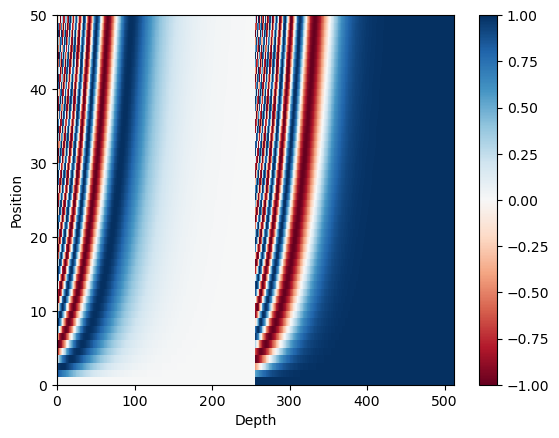

In [107]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

### Encoder Layer


In [108]:
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [109]:
sample_encoder_layer = encoder_layer(
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_encoder_layer")

tf.keras.utils.plot_model(
    sample_encoder_layer, to_file='encoder_layer.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Encoder

In [110]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  input1 = tf.keras.Input(shape=(None,), name="input1")
  input2 = tf.keras.Input(shape=(None,), name="imput2")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  embedding1 = tf.keras.layers.Embedding(vocab_size, d_model)(input1)
  embedding1 *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  embedding2 = tf.keras.layers.Embedding(vocab_size, d_model)(input2)
  embedding2 *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  embeddings = outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(embedding1 + embedding2)

  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[input1,input2, padding_mask], outputs=outputs, name=name)

In [ ]:
sample_encoder = encoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_encoder")

tf.keras.utils.plot_model(
   sample_encoder, to_file='encoder.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Decoder Layer


In [ ]:
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [ ]:
sample_decoder_layer = decoder_layer(
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_decoder_layer")

tf.keras.utils.plot_model(
    sample_decoder_layer, to_file='decoder_layer.png', show_shapes=True)

### Decoder


In [ ]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [ ]:
sample_decoder = decoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_decoder")

tf.keras.utils.plot_model(
    sample_decoder, to_file='decoder.png', show_shapes=True)

### Transformer


In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  input1 = tf.keras.Input(shape=(None,), name="input1")
  input2 = tf.keras.Input(shape=(None,), name="input2")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(input1)
  # mask the future tokens for decoder inputs at the 1st attention block
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)
  # mask the encoder outputs for the 2nd attention block
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(input1)

  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[input1, input2, enc_padding_mask])

  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[input1, input2, dec_inputs], outputs=outputs, name=name)

In [ ]:
sample_transformer = transformer(
    vocab_size=8192,
    num_layers=4,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_transformer")

tf.keras.utils.plot_model(
    sample_transformer, to_file='transformer.png', show_shapes=True)

## Train model

### Initialize model


In [ ]:
tf.keras.backend.clear_session()

# Hyper-parameters
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

### Loss function


In [ ]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

### Custom learning rate


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### Compile Model


In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

### Fit model


In [ ]:
EPOCHS = 50
model.fit(dataset, epochs=EPOCHS)

# Save and load model

In [ ]:
model.save_weights('mymodel1.h5')

In [ ]:
def create_model():
    NUM_LAYERS = 2
    D_MODEL = 256
    NUM_HEADS = 8
    UNITS = 512
    DROPOUT = 0.1

    model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
    return model
    

In [ ]:
test=create_model()

In [ ]:
test

In [ ]:
test.load_weights('mymodel1.h5')

In [ ]:
def evaluate(sentence,emotion):
    sentence = preprocess_sentence(sentence)

    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0
        
    )
    emotion = tokenizer.encode(emotion)

    output = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        predictions = test(inputs=[sentence,emotion, output], training=False)

        # select the last word from the seq_len dimension
        predictions = predictions[:, -1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # return the result if the predicted_id is equal to the end token
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # concatenated the predicted_id to the output which is given to the decoder
        # as its input.
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0)


def predict(sentence,emotion):
    prediction = evaluate(sentence,emotion)
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size]
    )
    return predicted_sentence

In [ ]:
predict("i am happy",'neutral')